<a href="https://colab.research.google.com/github/yahia-kplr/Statistics-With-Python_fr/blob/main/Exercices/1_Descriptive_Statistics.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistiques descriptives**

![image](https://user-images.githubusercontent.com/123748165/221905050-58c59c6b-ca24-4c37-98a0-007d3775eaba.png)
- Ce cahier présente les statistiques descriptives des variables numériques et catégorielles à travers les mesures de tendance centrale et les mesures de propagation.
- **Les statistiques sont divisées en deux domaines principaux :**

- **Statistiques descriptives :** décrivent et résument les données ;
- **Statistiques inférentielles :** méthodes d'utilisation de données d'échantillon pour tirer des conclusions générales (inférences) sur des populations.

- **Ce didacticiel se concentre sur les statistiques descriptives des variables numériques et catégorielles et est divisé en deux parties :**

- **Mesures de tendance centrale;**
- **Mesures de propagation.**
- Dans cette section, nous donnerons de courts résumés de statistiques numériques concernant les différentes mesures de tendance centrale et de dispersion de l'ensemble de données.

- Travaillons sur quelques exemples pratiques à travers un environnement de statistiques descriptives dans Pandas.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the dataset
df = pd.read_csv("sample.csv", sep=";")

In [ ]:
# Print the data
df.head(10)

Age         City
0   24        Paris
1   59     Toulouse
2   45  Montpellier
3   69     Bordeaux
4   21        Dijon
5   45    Marseille
6   65        Lille
7   52       Rennes
8   46     Grenoble
9   26    Marseille

In [ ]:
# Before stats, a quick look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     118 non-null    int64 
 1   City    118 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


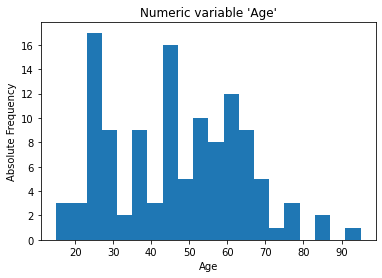

In [ ]:
# Histogram
plt.hist(df.Age, bins=20)
plt.xlabel("Age")
plt.ylabel("Absolute Frequency")
plt.title("Numeric variable 'Age'")
plt.show()

**Boxplot**


**Qu'est-ce qu'une boîte à moustaches ?**
Pour certaines distributions/ensembles de données, vous constaterez que vous avez besoin de plus d'informations que les mesures de tendance centrale (médiane, moyenne et mode).
![image](https://user-images.githubusercontent.com/123748165/221905261-4966d477-5416-4952-94c3-d568da877fc9.png)


- Vous avez besoin d'informations sur la variabilité ou la dispersion des données.
- Une boîte à moustaches est un graphique qui vous donne une bonne indication de la répartition des valeurs dans les données.
- Bien que les boîtes à moustaches puissent sembler primitives par rapport à un histogramme ou à un diagramme de densité, elles ont l'avantage de prendre moins de place, ce qui est utile pour comparer les distributions entre de nombreux groupes ou ensembles de données.


![image](https://user-images.githubusercontent.com/123748165/221905592-d364a03e-52e8-48a7-b81b-4dd83abfdd8b.png)


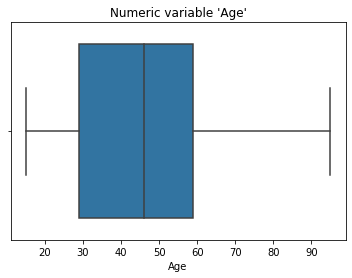

In [ ]:
# Boxplot
sns.boxplot(x="Age", data=df, orient="h").set(xlabel="Age", title="Numeric variable 'Age'");

In [ ]:
# Create a dataframe and display the 5-n summary stats
box = {"5-n summary": ["Age"],
           "Min": [df.Age.min()],
           "Q1": [df.Age.quantile(.25)],
           "Median": [df.Age.quantile(.5)],
           "Q3": [df.Age.quantile(.75)],
           "Max": [df.Age.max()]
}
plot = pd.DataFrame(box, columns=["5-n summary","Min","Q1","Median","Q3","Max"])
plot.set_index("5-n summary", inplace=True)

boxplot = plot.T
boxplot

5-n summary   Age
Min          15.0
Q1           29.0
Median       46.0
Q3           59.0
Max          95.0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


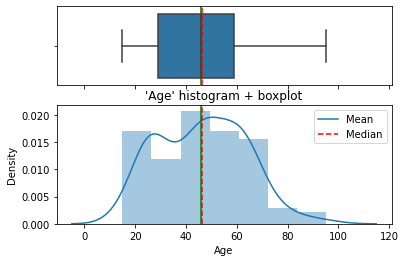

In [ ]:
# Histogram + boxplot
age = df.Age
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.8, 1.2)})

mean=np.array(age).mean()
median=np.median(age)

sns.boxplot(age, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(age, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.title("'Age' histogram + boxplot")

ax_box.set(xlabel='')
plt.show()


# **1.1. Mesures de tendance centrale**


### **Calculer la moyenne**


![image](https://user-images.githubusercontent.com/123748165/221905698-e171fc76-2322-4d23-9034-e05b60e060d2.png)


#### #FAIRE
- Essayez de calculer la moyenne de l'âge :


In [ ]:
# Mean
#Fill_Here

46.25423728813559

### **Calculer la médiane**


![image](https://user-images.githubusercontent.com/123748165/221905755-da9797bf-b8f2-40ab-962a-7191dd8dad3e.png)


#### #FAIRE
- Essayez de calculer la médiane de l'âge :


In [ ]:
# Median
#Fill_here

46.0

**Quelle mesure est la plus robuste aux valeurs aberrantes ?**
La moyenne est celle à utiliser avec des données distribuées symétriquement, sinon, utilisez la médiane. Cependant, une propriété importante de la moyenne est qu'elle inclut toutes les valeurs de votre ensemble de données dans le cadre du calcul.

# **1.2. Mesures de propagation**


### **Calculer l'écart type**


![image](https://user-images.githubusercontent.com/123748165/221905840-affeefa8-bc48-4b43-8920-9471977b98b3.png)


#### #FAIRE
- Essayez de calculer l'écart type de Age :


In [ ]:
# Standard deviation
#Fill_Here

17.194307565620715

### **Calculer la variance**


#### #FAIRE
- Essayez de calculer la variance de Age :


In [ ]:
# Variance
#Fill_here

295.6442126611618

### **Calculer les centiles**


![image](https://user-images.githubusercontent.com/123748165/221905929-009616fc-c2b1-4c0b-8f46-5b0448a70fbf.png)


#### #FAIRE
- Essayez de calculer le centile 25 % de l'âge :


In [ ]:
# Percentiles 25%
#Fill_here

29.0

#### #FAIRE
- Essayez de calculer le centile d'âge à 75 % :


In [ ]:
# Percentile 75%
# Fill_here

59.0

#### #FAIRE
- Essayez de calculer les 25 % et 75 centiles d'âge en une seule ligne de commande :


In [ ]:
# In one go
#Fill_here

0.25    29.0
0.75    59.0
Name: Age, dtype: float64

#### #FAIRE
- Essayez de calculer le max et le min d'Age :


In [ ]:
# Minimum and Maxim
#fill_here

(15, 95)

# **1.3. Autres**


In [ ]:
# Size (number of rows)
df.Age.count()

118

In [ ]:
# Number of uniques (total distinct)
df.Age.nunique()

44

In [ ]:
# Uniques (distinct)
df.Age.unique()

array([24, 59, 45, 69, 21, 65, 52, 46, 26, 35, 42, 23, 25, 62, 51, 22, 44,
       55, 53, 41, 48, 57, 58, 49, 56, 36, 15, 54, 28, 29, 61, 27, 75, 73,
       19, 85, 76, 38, 34, 67, 84, 68, 95, 64])

# **2. Variable catégorielle**


![image](https://user-images.githubusercontent.com/123748165/222190254-d520fc23-0b9a-4c60-9524-3f89f9360394.png)


La variable catégorielle que nous allons analyser est la ville. Traçons un graphique à barres et obtenons une observation visuelle de la variable.


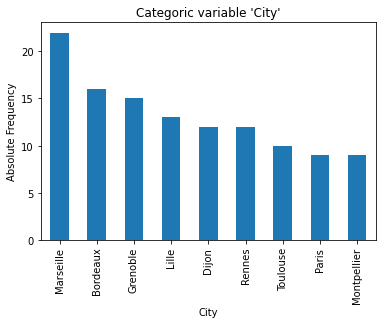

In [ ]:
# Bar plot
df.City.value_counts().plot.bar()
plt.xlabel("City")
plt.ylabel("Absolute Frequency")
plt.title("Categoric variable 'City'")
plt.show()

# **2.1. Mesures de tendance centrale**


#### #FAIRE
- Essayez de calculer le mode de City :


In [ ]:
# Mode
#fill_here

'Marseille'

# **2.2. Mesures de propagation**


#### #FAIRE
- Essayez de calculer les mesures de propagation de la ville :


In [ ]:
# fill_here

9

In [ ]:
# Uniques (distinct)
#fill_here

array(['Paris', 'Toulouse', 'Montpellier', 'Bordeaux', 'Dijon',
       'Marseille', 'Lille', 'Rennes', 'Grenoble'], dtype=object)

In [ ]:
# Most frequent unique (value count)
#fill_here

Marseille    22
Name: City, dtype: int64

# **2.3. Autres**


In [ ]:
# Size (number of rows)
df.City.count()

118

In [ ]:
# % of the highest unique (fraction of the 
# most common unique in regards to all the others)
p = df.City.value_counts(normalize=True)[0]
print(f"{p:.1%}")

18.6%


La méthode **describe()** affiche les statistiques descriptives rassemblées dans un tableau. Par défaut, statistiques pour les données numériques. Le résultat est représenté sous la forme d'une trame de données pandas.


In [ ]:
# Numeric stats
df.describe()

Age
count  118.000000
mean    46.254237
std     17.194308
min     15.000000
25%     29.000000
50%     46.000000
75%     59.000000
max     95.000000

In [ ]:
# Adding other non-standard values 
# for instance, the 'variance'
describe_var = df.describe()
describe_var.append(pd.Series(df.var(), name='variance'))

<ipython-input-36-8d98d71136a3>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  describe_var.append(pd.Series(df.var(), name='variance'))


Age
count     118.000000
mean       46.254237
std        17.194308
min        15.000000
25%        29.000000
50%        46.000000
75%        59.000000
max        95.000000
variance  295.644213

In [ ]:
# Displaying categorical data
df.describe(include="O")

# The same as:
# df.describe(exclude=['float64','int64'])
# df.describe(include=[np.object])

City
count         118
unique          9
top     Marseille
freq           22

In [ ]:
# By passing the parameter include='all'
# displays both numeric and categoric 
# variables at once
df.describe(include="all")

Age       City
count   118.000000        118
unique         NaN          9
top            NaN  Marseille
freq           NaN         22
mean     46.254237        NaN
std      17.194308        NaN
min      15.000000        NaN
25%      29.000000        NaN
50%      46.000000        NaN
75%      59.000000        NaN
max      95.000000        NaN